In [1]:
from pathlib import Path
import datetime
import sys
import scipy.integrate
import random
import math

%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

import matplotlib as mpl
import matplotlib.font_manager as fm



import spectrochempy as scp
#from spectrochempy.core.dataset.nddataset import NDDataset

mpl.rc('text', usetex=False)
#Code for using superscripts
def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)
#Checks to make sure you are in the right folder, if this is wrong reload
import os
print(os.getcwd())

plt.rcParams['font.family'] = 'Helvetica'
def step_approx(t,it,per):
    T = per
    i = 1
    sum = 0.
    while i <= it: # compute the Fourier series for N iterations
        a = (1 / (2.*i-1.)) * math.sin((2. * (2.*i-1.) * math.pi * t) / T)
        sum = sum + a
        i += 1
    return (4. / math.pi) * sum


"<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABgAAAAYCAYAAADgdz34AAAAAXNSR0IArs4c6QAAAAlw SFlzAAAJOgAACToB8GSSSgAAAetpVFh0WE1MOmNvbS5hZG9iZS54bXAAAAAAADx4OnhtcG1ldGEgeG1sbnM6eD0iYWRvYmU6bnM6 bWV0YS8iIHg6eG1wdGs9IlhNUCBDb3JlIDUuNC4wIj4KICAgPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8x OTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICAgICAgPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9IiIKICAgICAgICAgICAg eG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICAgICAgICAgICB4bWxuczp0aWZmPSJodHRwOi8vbnMu YWRvYmUuY29tL3RpZmYvMS4wLyI+CiAgICAgICAgIDx4bXA6Q3JlYXRvclRvb2w+bWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4wLCBo dHRwOi8vbWF0cGxvdGxpYi5vcmcvPC94bXA6Q3JlYXRvclRvb2w+CiAgICAgICAgIDx0aWZmOk9yaWVudGF0aW9uPjE8L3RpZmY6 T3JpZW50YXRpb24+CiAgICAgIDwvcmRmOkRlc2NyaXB0aW9uPgogICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgqNQaNYAAAGiUlE QVRIDY1We4xU1Rn/3XPuYx47u8w+hnU38hTcuoUEt/6D2y4RB0ME1BoEd9taJaKh9CFiN7YGp7appUAMNmktMZFoJTYVLVQ0smsy 26CN0SU1QgsuFAaW3WVmx33N677O6XfuyoIxTXqSO/fec+75fd93vt/3/UbDV0aKSZmCpkFMLz3T9utuu2N+o98aDSMBKVAo89z5 y+zEz3ZafcCOfvWdlGCalqKn1Bf71CygTd+mf1esSOnpdMpTb+vWpTZuWVfe3jLPa5tzHYNm0T5N0gpdkkHaDBeGBU6d1/t/fyS8 +/CbqdfUvmsx1PuMgc2bNxv79u1zgd31r+7JH1jbIZKxWRXAcYUQ8IWvBfBXNjEuJWPgMA02NR7C3/pYT9fjdZ3A9tGrWF8YSJHn qcDz3y7q2T967PZv+gnYJdd1mEZ+62zGDQV/dQgKhmLzDNOXCEWM3j6eTT5Y3w78dOBKJLR1PQf+4ivPj76UPZnssBN+wbM9Aet/ AV81Mf1EEULXYfOobvX2WWQk0aoioXwwSmirOlioY0mu8BIouzYl7P8GV3vpqCCEZvlFz769w08oLDWvyKIyL1asSm28d6WfzA97 ztvvV1kexUMsmhlkULEkuGYmFYC6AvfUrITnwUKl5K79lkjeSSRRTCTbQPd95e1WzMbZSya74XoXAxctCllCnbECMOjZNGRwvzIX nD85wbkMmKK+U045Dtdi8Qp+SAxU2GTg2bYlC9224pgvmSb54vkVTBQYyhUt2KjAMyMmPjwRQW5Mh2WKwJhlBh6jVGagFM84wZnQ 4bpC0Rt4pk1PbSt0NDcxDA5xryosDHWgtbM0DGZDWLSoiDMDYeQnGVrmOThxLozB0RAaahzkJzjKNqcIQBymJFMkOlN8Dqjpg0XY Tx5xO/QbmmUrqIjGJznq47TqTaClKYfjp+PInLMwnOdYvtQBZ2XcunQY+VwIo4U4muoFEjVEFE6lQyEUKzHYfgQG9ylCyngU+Cxj tOqxCDGHcCsOMCs6iQul5ZiStdATYxjMZXDLTUVwLY8Jey4uOh2IxjwsrP8UXJYxUrkZrghBahzV5iXU6gNkq0Z1EzIsUBUSCV2n EOHo0LVxHCpuxabJJdhi5PFnvw5vLXwXIfNZvD/+JNo/X40NegE54sUaazl+UL8XD1x+FB9Ijjt4EQfdGN6J/x131LwIV9ap/AYs 0x1fz1ZKFbh6A7qKy/By9Dg6G36Ep91vUJJ15Cqr0Z67E8/HzmBrw1OwxWyM+3Mo6BAuSB17oyfx0Oyl2DN0Hqs/70Cx6hBCvESF UY1ShWXZZEE7OTAYxZzaPH4TuoiusZvRnunFy2NbiHYuBp2vB66srX4vMEjpRKPxKXmnoQ4+Mn4DPiv8CYcrs3GfNUXJLtM+alSO hrMj/KT+wBNW3+E/2liywNO3iSflbaFva/+stGDTxE0E9Sjaox8HBhxpEamzMGSEaFKg+mjEddzDh1MxTDq3YV1kGBsjfwW3S9Cq anjmko+ndlb1UR3s6K8JlfphNWq9Ew/7c61T2BB/EbcaNkb8GBaE0tANH7/M34PLdhJDzjIcL9xPbdTG6zyM72Y+wXPHmvB489No fm0b5HnbQ9Rgp/7DSSd29AeVvPeNyK6JcYl/yQVi5dBjuGvoV/gaJe47s45QUxrDmcYX0MBsdF7egvXZ7+O0vZA4X8QmOQWjlSK7 RDz5wIM30gp9UbWcGjXxhzdDu1SiNSpx6kcQB57rPnr/3dlkZarWLnlRq5oPET1dOCIOk4wALib9eeS5iygfhkd09H0DWphB/+gs +PcOAS+ssrFmmXXgVfR0de9cpbAJfH3Q1jofW9DZk56dDcVsq9YcsoUMEd1qyLoT3BX1YiyHMJuk97hyjqIoE91t+NcTLeN0ZrfM oXatZbu6G0h4VG+ibqq0IJVK6cAjo6serG3vSUezCMct0yQeSOFJSUImqb2qbknUpDqlZxE0QZ+ZUpSlZx79h4Nda6zef9dlk121 JDjbR5XggPRZlRnS6bRQRtLpn4++cuie/Yvn2svmNxuLw9WCcYIl4fEoTEGiSTUqJdfgU+8ROqf1iMkLzS389YtNPXc/PH8l8ONB JZkHD+4JtD04HmVEDWWErmBhzV2/2LB1bemJG6krzv2S6NOHUgtEP0Oif5pE/3fHoruP7N8RiP61GArzSwbUhJJQpXJKiKbfr/3b IhKq76sKPUdF9NW/LSqfSn6vjv8C45H/6FSgvZQAAAAASUVORK5CYII=' style='height:25px; border-radius:12px; display:inline-block; float:left; vertical-align:middle'>",SpectroChemPy's API - v.0.6.5© Copyright 2014-2023 - A.Travert & C.Fernandez @ LCS


C:\Users\jdnor\Documents\GitHub\SwearerCode


In [39]:


testspa = scp.read_omnic("series00040000.spa")
testspa2 = scp.read_omnic("series00040001.spa")

testspa.add_coordset(scp.Coord(data = [1], name = "Wows", units = "min"))
testspa = scp.stack(testspa,testspa)
print(testspa2)
testspa2.squeeze(inplace = True)
testspa2 = scp.stack(testspa2,testspa2)[0,:]

print(testspa2)

NDDataset: [float64] dimensionless (shape: (y:1, x:831))
NDDataset: [float64] dimensionless (shape: (y:1, x:831))


In [2]:
frames =54
name = 'FTIR_230629_CuRuMgOAl2O3_ERN1_26_NH3_hv168mW450650nm_P1s'
for x in range(0,frames):
    # Edit the CSV Name here for your first file
    strnum = f'{str(x):0>4}'
    
    spec_slice = scp.read_omnic(name + strnum +'.csv')
    spec_slice_name = spec_slice.name
    
    timename = float(spec_slice.name.replace('Linked spectrum at ','').replace(' min.','').replace(' sec.',''))
    if spec_slice_name[-4:] == "min.":
        timecoord = scp.Coord(data = [timename*60],name = 'Time', units = 's')
    elif spec_slice_name[-4:] == "sec.":
        timecoord = scp.Coord(data = [timename],name = 'Time', units = 's')
    spec_slice.y = timecoord
    if x == 0:
        spec_2D = spec_slice
    else:
        spec_2D = scp.concatenate(spec_2D,spec_slice,axis ='y')
    if x % 25 == 0:
        print("check")
spec_2D.name = name
print(spec_2D)

meanspec_2D = scp.mean(spec_2D, dim = 'y', keepdims = True)
spec_2D
    #if x == 1:
       # ramandf = raman_temp_df.iloc[:,[2,5]]
        
    #else:
       # ramandf.loc[:,"counts"] = (ramandf.loc[:,"counts"] + raman_temp_df.loc[:,"counts"])/2
        #print(ramandf.head())

check
check
check
NDDataset: [float64] dimensionless (shape: (y:54, x:1738))


name,FTIR_230629_CuRuMgOAl2O3_ERN1_26_NH3_hv168mW450650nm_P1s
author,jdnor@DESKTOP-B5JS2UP
created,2023-09-13 18:01:45-05:00
description,"Concatenation of 2 datasets: ( Linked spectrum at 20.037 sec., Linked spectrum at 20.417 sec. )"
history,2023-09-13 18:01:45-05:00> Created by concatenate
DATA,
title,Kubelka-Munk
values,[[ 0.08366 0.08419 ... 0.0478 0.07268] [ 0.1039 0.1046 ... 0.3003 0.426] ... [ 0.1238 0.1228 ... 5000 5000] [ 0.07519 0.07572 ... 0.3171 0.3525]]
shape,"(y:54, x:1738)"
DIMENSION `x`,
size,1738


In [3]:
meanspec_2D = scp.mean(spec_2D, dim = 'y', keepdims = True)
for y_loc in range(spec_2D.y.size):
    avspec_1D = spec_2D[y_loc,:] - meanspec_2D 
    if y_loc == 0:
        averaged2D = avspec_1D
    else: 
        averaged2D = scp.concatenate(averaged2D,avspec_1D, dim = 'y')
averaged2D
    

name,FTIR_230629_CuRuMgOAl2O3_ERN1_26_NH3_hv168mW450650nm_P1s
author,jdnor@DESKTOP-B5JS2UP
created,2023-09-13 18:01:45-05:00
modified,2023-09-13 18:02:25-05:00
description,"Concatenation of 2 datasets: ( FTIR_230629_CuRuMgOAl2O3_ERN1_26_NH3_hv168mW450650nm_P1s, FTIR_230629_CuRuMgOAl2O3_ERN1_26_NH3_hv168mW450650nm_P1s )"
history,2023-09-13 18:02:25-05:00> Created by concatenate
DATA,
title,Kubelka-Munk
values,[[-0.01343 -0.01285 ... -92.72 -92.76] [0.006829 0.007587 ... -92.47 -92.41] ... [ 0.02674 0.02576 ... 4907 4907] [ -0.0219 -0.02131 ... -92.45 -92.48]]
shape,"(y:54, x:1738)"
DIMENSION `x`,


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

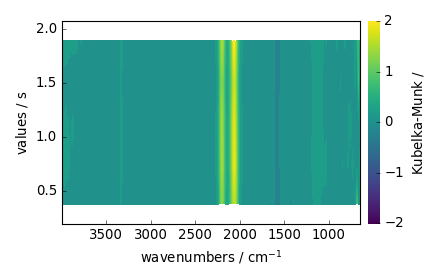

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

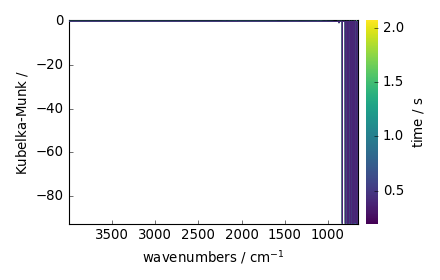

In [10]:
averaged2D.y.title = 'time'
_ = spec_2D[0.0:2.0,:].plot_image(colorbar=True)
_ = averaged2D[0.0:2.0,:].plot(colorbar = True)

In [12]:
y_size = spec_2D.y.size
for y_phase in range(54):
    sin_shift = y_phase*(1)/54
    for y_pos, y in enumerate(averaged2D.coordset.y):
        sin_point = step_approx(y.data[0]+sin_shift,100,1)
        sin_slice = scp.full_like(averaged2D[y_pos,:],fill_value=sin_point)
        if y_pos == 0:
            sin_set = sin_slice
        else:
            sin_set = scp.concatenate(sin_set,sin_slice,axis ='y')
    phase_slice = scp.trapezoid(np.multiply(averaged2D,sin_set),dim = "y")
    phase_slice = scp.stack(phase_slice,phase_slice)[0:1]
    phase_slice.y = scp.Coord(data = [y_phase*math.pi/54], name = "y", title = 'phase')
    if y_phase == 0:
        
        phase_set = phase_slice
    else: 
        phase_set = scp.concatenate(phase_set,phase_slice, dim = 'y')
        
        if y_phase % 2 == 0:
            print(y_phase)
   
        
#sin_data = math.sin(coords_2D.x[:])
#osc_sin = NDDataset(,coordset = 2D_coords)
phase_set
#for x in y_size:
    #time_slice = spec_2D[:,x]
    


2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52


name,FTIR_230629_CuRuMgOAl2O3_ERN1_26_NH3_hv168mW450650nm_P1s
author,jdnor@DESKTOP-B5JS2UP
created,2023-09-13 18:01:45-05:00
modified,2023-09-13 18:19:54-05:00
description,"Concatenation of 2 datasets: ( FTIR_230629_CuRuMgOAl2O3_ERN1_26_NH3_hv168mW450650nm_P1s, FTIR_230629_CuRuMgOAl2O3_ERN1_26_NH3_hv168mW450650nm_P1s )"
history,2023-09-13 18:19:54-05:00> Created by concatenate
DATA,
title,area
values,[[-0.08993 -0.08926 ... 1880 1879] [-0.04969 -0.04825 ... 1854 1852] ... [ -0.187 -0.1854 ... -120.5 -120] [ -0.1617 -0.1608 ... 1885 1886]] K.M.².s
shape,"(y:54, x:1738)"
DIMENSION `x`,


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


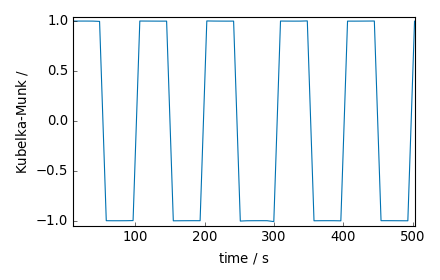

In [85]:
for y_pos, y in enumerate(averaged2D.coordset.y):
        sin_point = step_approx(y.data[0],100,100)
        sin_slice = scp.full_like(averaged2D[y_pos,:],fill_value=sin_point)
        if y_pos == 0:
            sin_set = sin_slice
        else:
            sin_set = scp.concatenate(sin_set,sin_slice,axis ='y')
_ = sin_set[0.0:500.0,20].plot()

WindowsPath('C:/Users/jdnor/Documents/GitHub/SwearerCode/phaseset_100_0004.scp')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

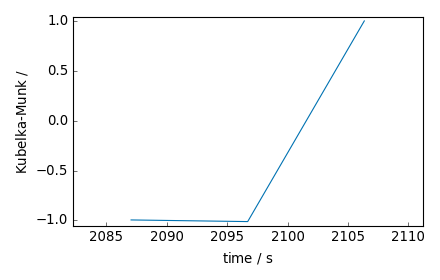

In [116]:
_ = sin_set[2090.0:2110.0,20].plot()
scp.write(phase_set,"phaseset_100_0004.scp")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

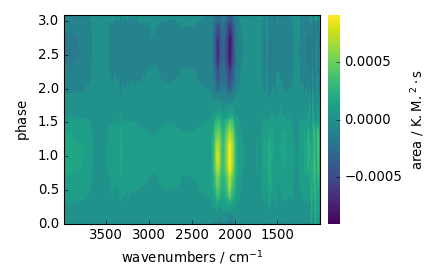

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

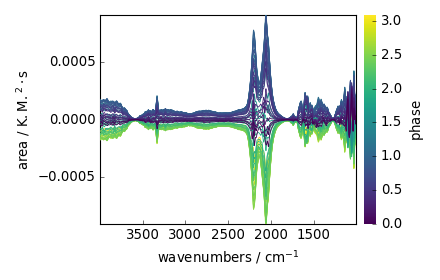

In [13]:
#phase_set.y.set_units
_ = (phase_set[:,:1000.0]*(2/3600)).plot_image(colorbar=True)
_ = (phase_set[:,:1000.0]*(2/3600)).plot(colorbar=True)

In [32]:
max_phases = []
max_wn = []
xloc = 0
for xloc in range(phase_set.x.size):
    max_point = scp.argmax(phase_set[:,xloc])
    max_wn.append(phase_set.x.values[xloc])
    max_phases.append(phase_set.y.values[max_point[0]])
#print(max_point)
#print(phase_set.x.values[xloc])
#print(phase_set.y.values[max_point[0]])
print(max_phases)
max_phases_DS = NDDataset([max_wn,max_phases])
max_phases_DS

 ERROR | NameError: name 'NDDataset' is not defined


[1.047, 1.047, 1.047, 1.047, 1.047, 1.047, 1.047, 1.047, 1.047, 1.047, 1.047, 0.989, 0.989, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 0.989, 0.989, 1.164, 1.164, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 1.047, 1.047, 1.047, 1.047, 1.164, 1.164, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 0.931, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 0.989, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.164, 1.047, 1.047, 1.047, 1.047, 1.047, 1.047, 1.047, 1.047, 1.047, 1.047, 1.047, 1.047, 1.047, 1.047

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

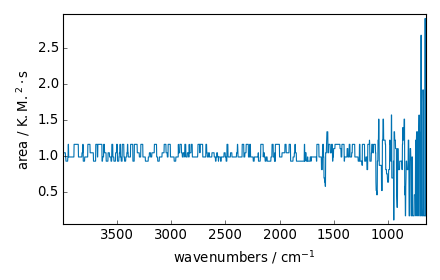

In [46]:
max_phases_DS = phase_set[0,:]
max_phases_DS.squeeze(inplace = True)
max_phases_DS.data = max_phases
max_phases_DS.units = phase_set.y.units
_ = max_phases_DS.plot()

In [ ]:
y_size = spec_2D.y.size
for y_phase in range(20):
    sin_shift = y_phase*(50)/20
    for y_pos, y in enumerate(averaged2D.coordset.y):
        sin_point = math.sin(y.data[0]*(math.pi/50)+sin_shift)
        sin_slice = scp.full_like(averaged2D[y_pos,:],fill_value=sin_point)
        if y_pos == 0:
            sin_set = sin_slice
        else:
            sin_set = scp.concatenate(sin_set,sin_slice,axis ='y')
    phase_slice = scp.trapezoid(np.multiply(averaged2D,sin_set),dim = "y")
    phase_slice = scp.stack(phase_slice,phase_slice)[0:1]
    phase_slice.y = scp.Coord(data = [y_phase*math.pi/10], name = "y", title = 'phase')
    if y_phase == 0:
        
        phase_set = phase_slice
    else: 
        phase_set = scp.concatenate(phase_set,phase_slice, dim = 'y')
        
        if y_phase % 5 == 0:
            print(y_phase)
   
        
#sin_data = math.sin(coords_2D.x[:])
#osc_sin = NDDataset(,coordset = 2D_coords)
phase_set
#for x in y_size:
    #time_slice = spec_2D[:,x]